In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file path and load data
data_dir = '../data/processed/'
file_name = 'cleaned_dataset.csv'
df = pd.read_csv(os.path.join(data_dir, file_name))\

print(f"Number of rows and columns: {df.shape}\n")
print("Dataset information:")
print(df.info())

Number of rows and columns: (7121, 51)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            7121 non-null   int64  
 1   Index                                                 7121 non-null   int64  
 2   Address                                               7121 non-null   object 
 3   FLAG                                                  7121 non-null   int64  
 4   Avg min between sent tnx                              7121 non-null   float64
 5   Avg min between received tnx                          7121 non-null   float64
 6   Time Diff between first and last (Mins)               7121 non-null   float64
 7   Sent tnx                                              7121 non-null   int64  
 8

In [102]:
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
        Unnamed: 0        Index         FLAG  Avg min between sent tnx  \
count  7121.000000  7121.000000  7121.000000               7121.000000   
mean   4772.818846  1843.429294     0.189580               4472.630513   
std    2781.004115  1237.050298     0.391996              17741.696100   
min       0.000000     1.000000     0.000000                  0.000000   
25%    2386.000000   834.000000     0.000000                  0.000000   
50%    4743.000000  1668.000000     0.000000                 23.210000   
75%    7107.000000  2646.000000     0.000000                733.090000   
max    9840.000000  4729.000000     1.000000             299334.140000   

       Avg min between received tnx  Time Diff between first and last (Mins)  \
count                   7121.000000                             7.121000e+03   
mean                    7846.636450                             1.901013e+05   
std                    23408.471326                  

In [103]:
missing = df.isnull().sum()
print("\nColumns with missing values:")
print(missing[missing > 0])


Columns with missing values:
Series([], dtype: int64)


In [104]:
# Display count of classes in target column 'FLAG'
target_col = 'FLAG'
print("\nCounts per class:")
print(df[target_col].value_counts())


Counts per class:
FLAG
0    5771
1    1350
Name: count, dtype: int64


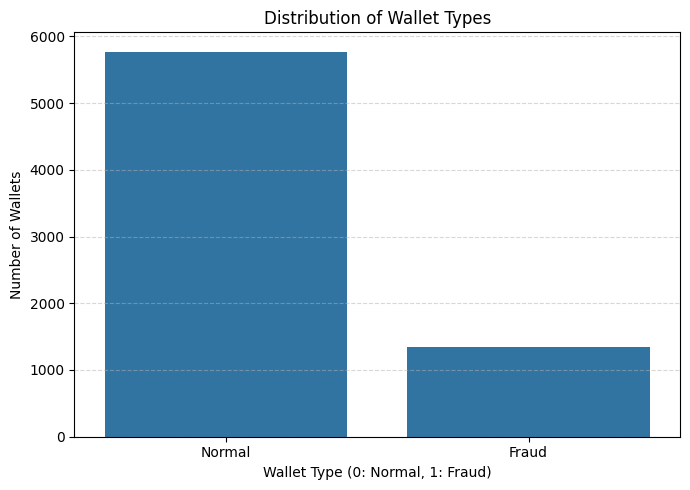

In [105]:
plt.figure(figsize=(7, 5))
sns.countplot(x=target_col, data=df)
plt.title('Distribution of Wallet Types')
plt.xlabel('Wallet Type (0: Normal, 1: Fraud)')
plt.ylabel('Number of Wallets')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Setup and Correlation Analysis**

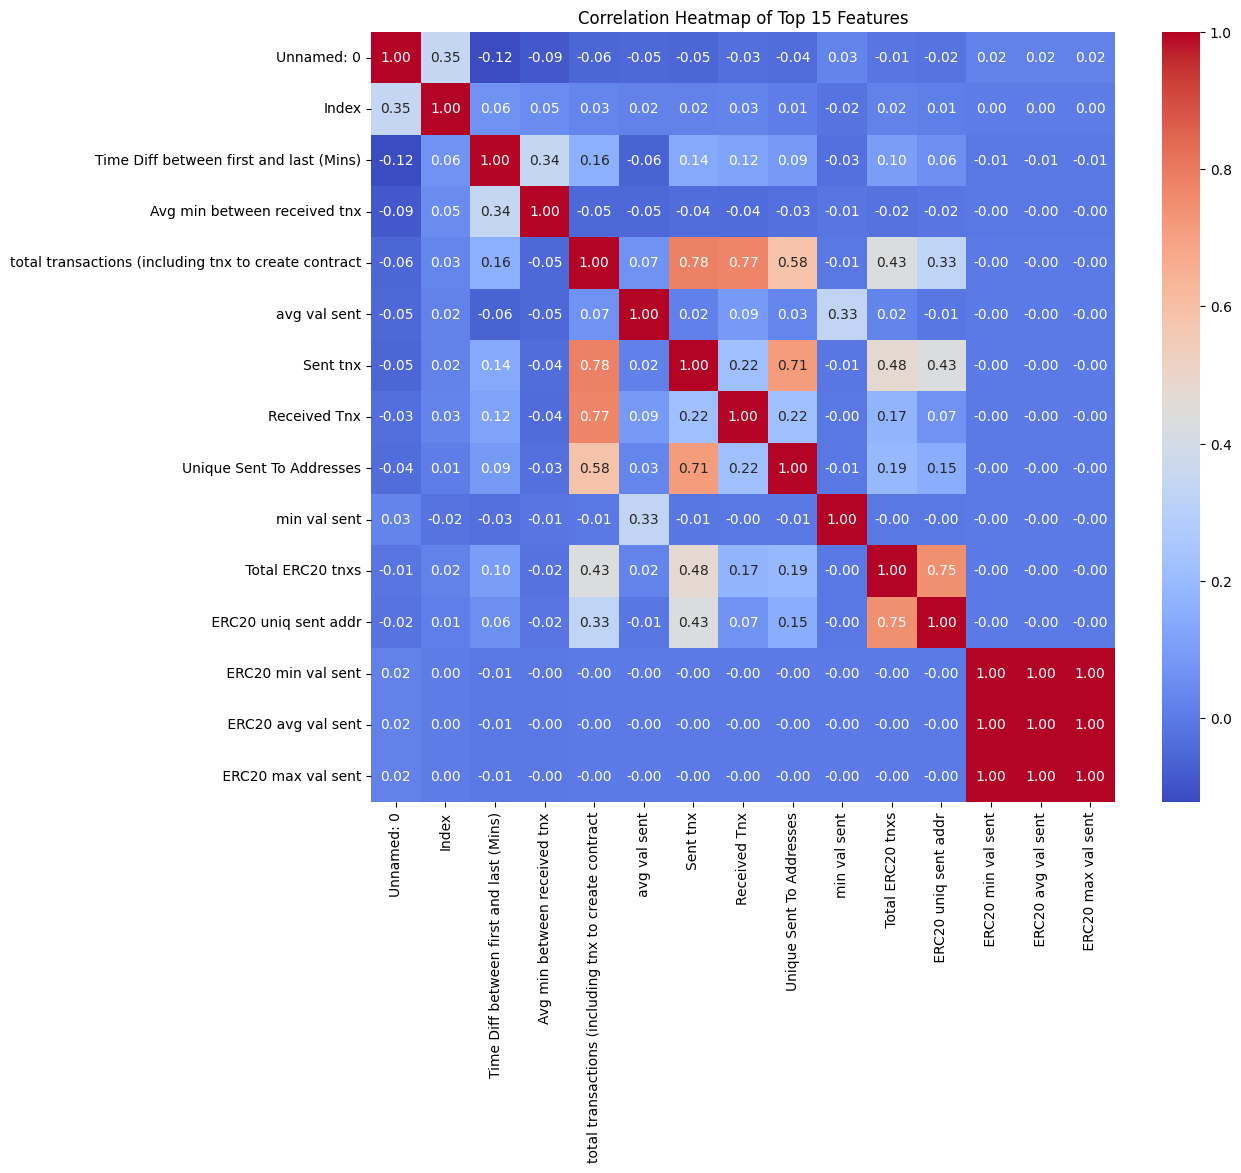

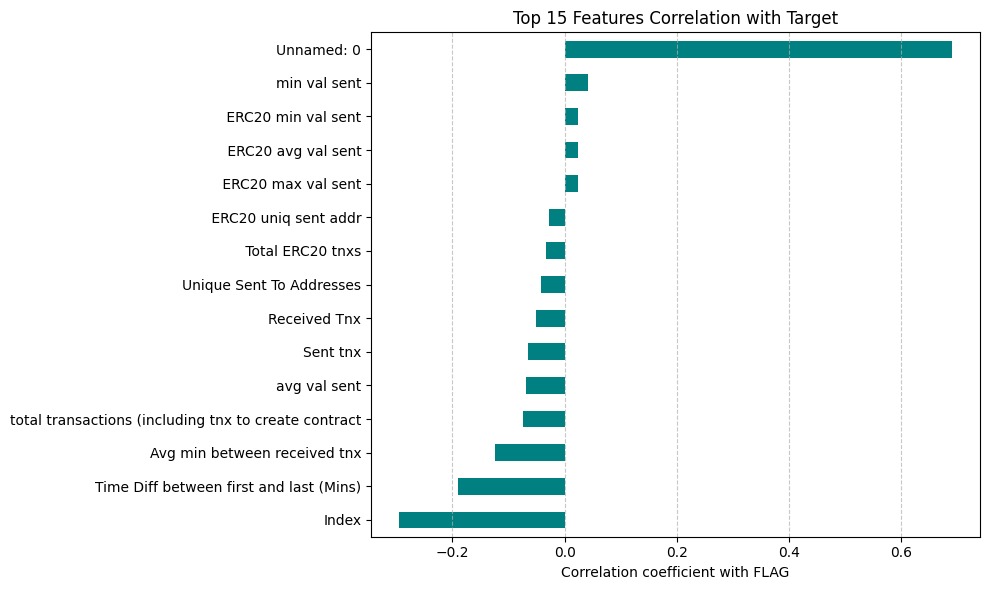

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix on numeric columns
correlation_matrix = numeric_df.corr()

# Extract correlation values with target variable 'FLAG'
target_corr = correlation_matrix['FLAG'].drop('FLAG')

# Select top 15 features most correlated (absolute value) with the target
top_features = target_corr.abs().sort_values(ascending=False).head(15).index

# Correlation heatmap of top features
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Top 15 Features')
plt.show()

# Bar plot for correlation of top features with the target
plt.figure(figsize=(10, 6))
target_corr.loc[top_features].sort_values().plot(kind='barh', color='teal')
plt.xlabel('Correlation coefficient with FLAG')
plt.title('Top 15 Features Correlation with Target')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


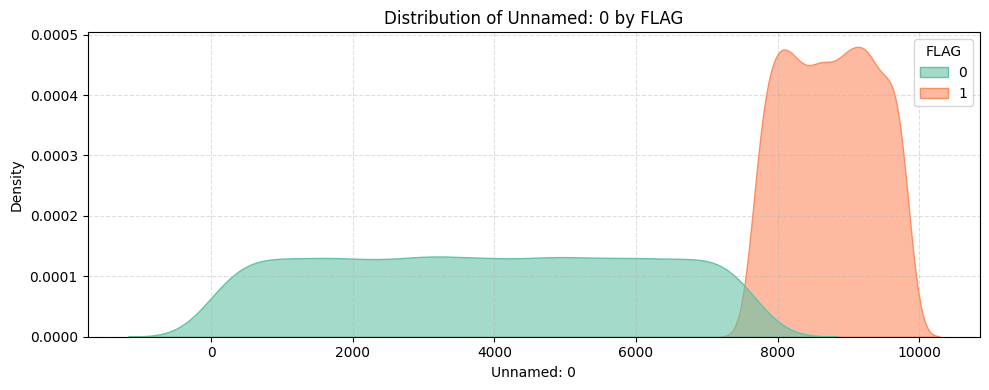

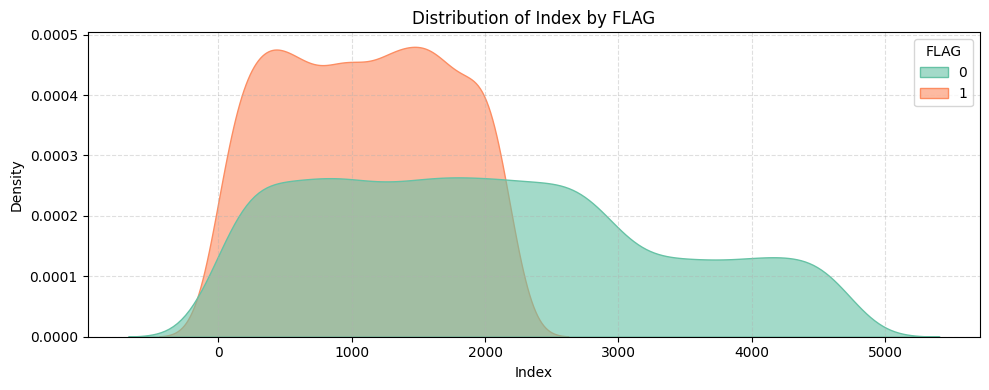

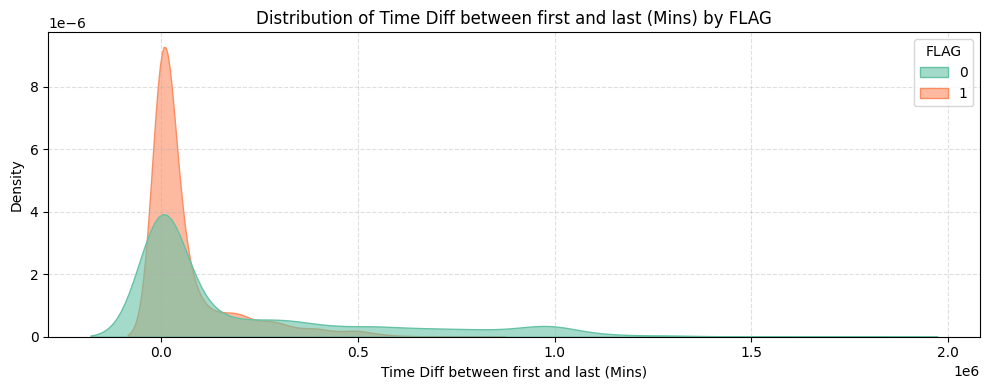

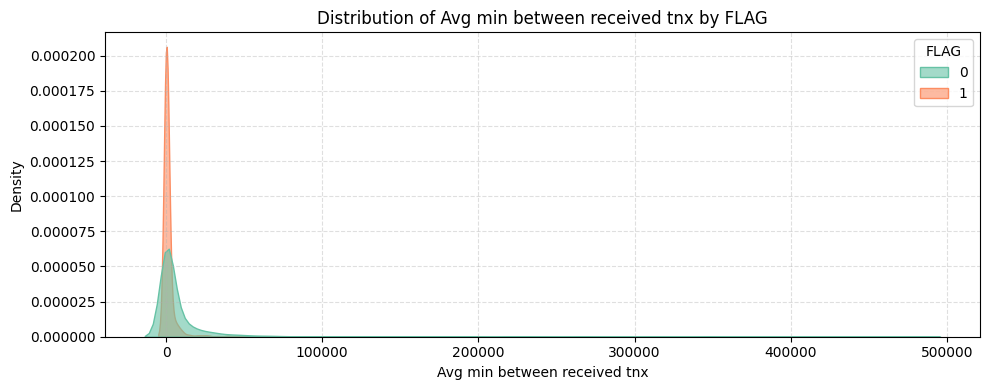

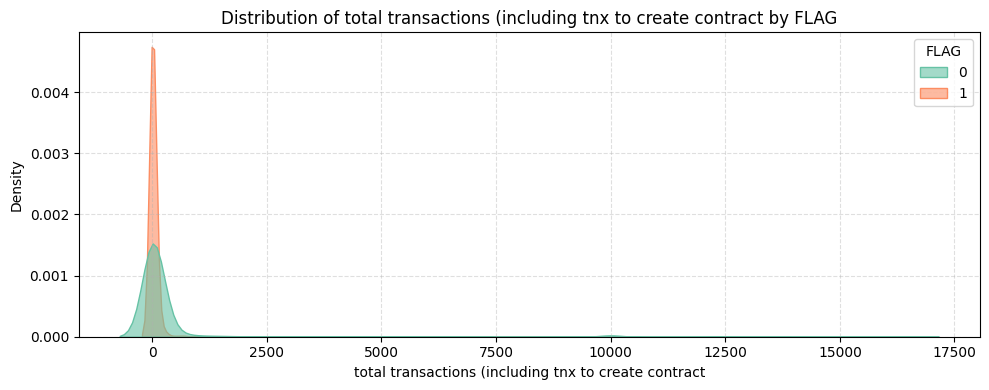

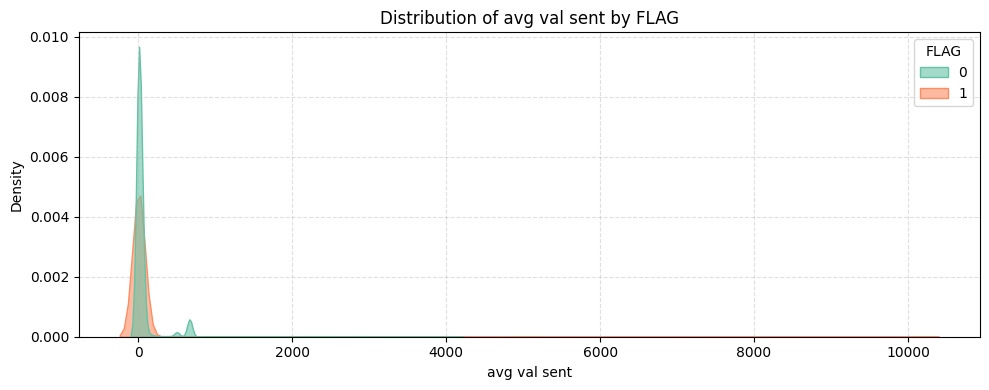

In [127]:
# Select top 6 most correlated features by absolute correlation
top6 = target_corr.abs().sort_values(ascending=False).head(6).index

for col in top6:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=df, x=col, hue='FLAG', common_norm=False, fill=True, palette='Set2', alpha=0.6)
    plt.title(f'Distribution of {col} by FLAG')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


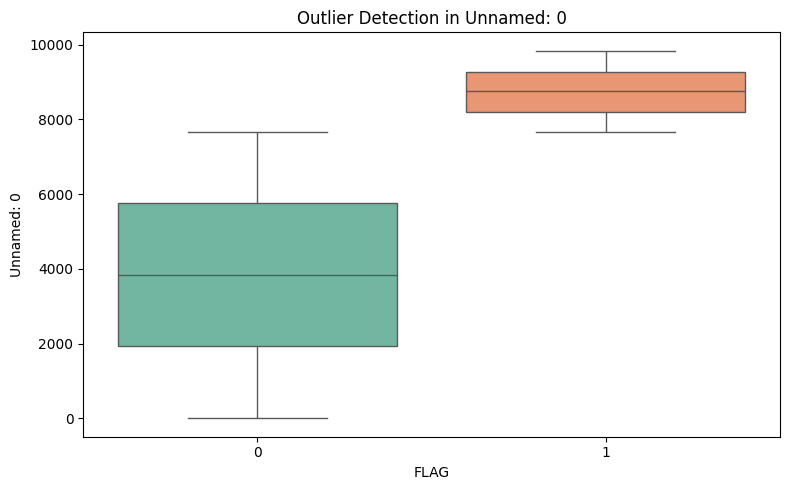

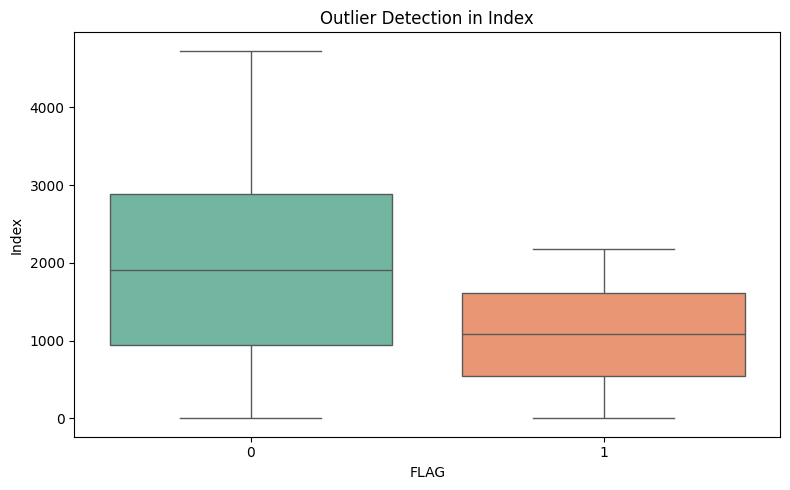

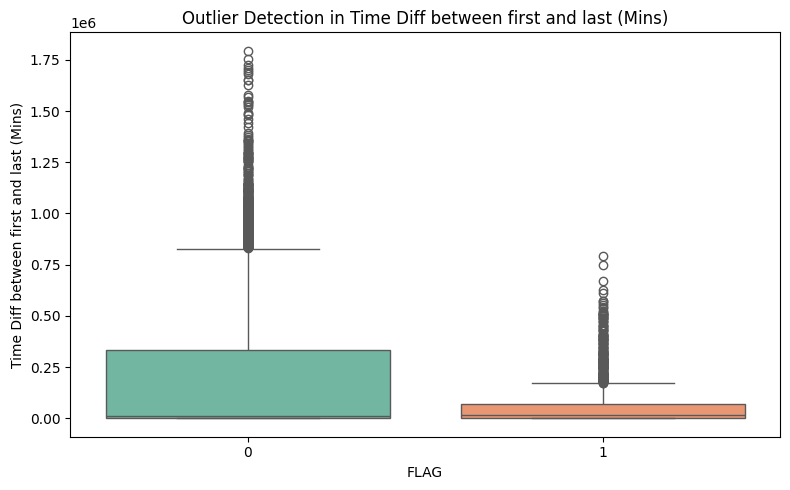

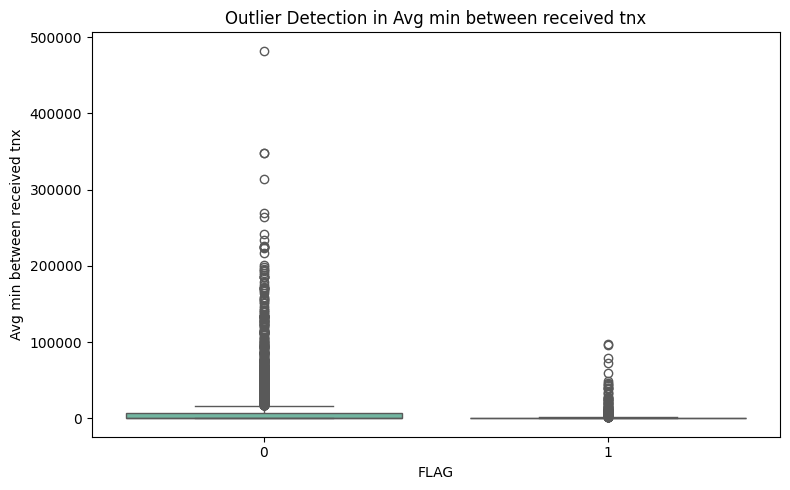

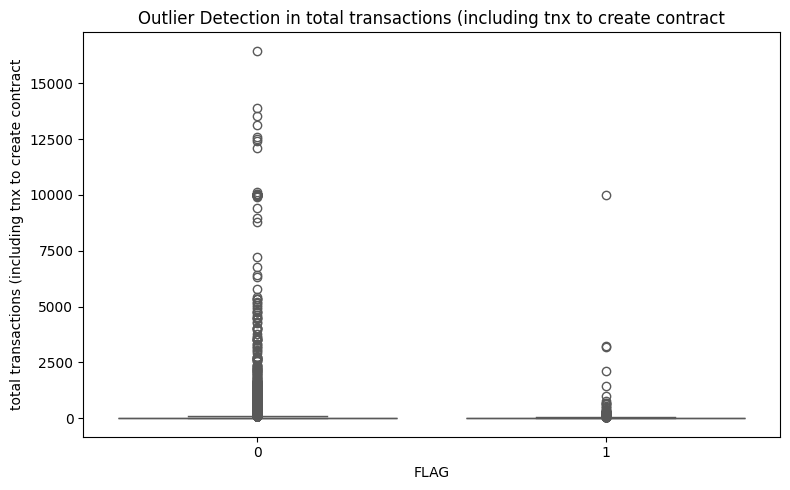

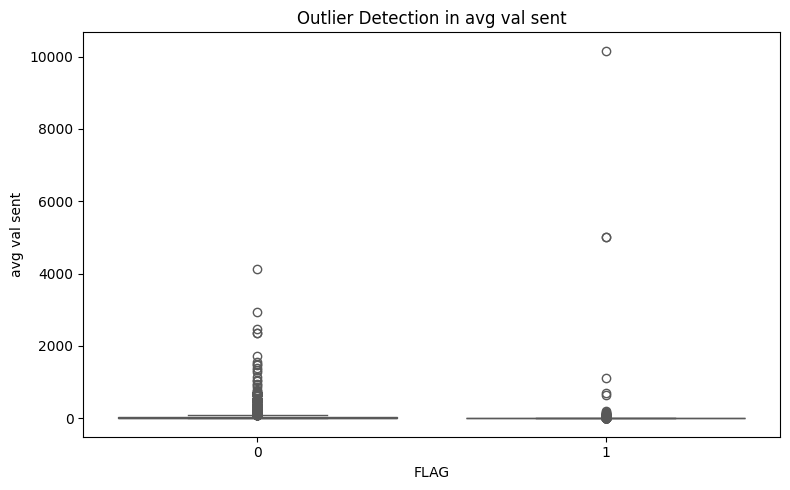

In [128]:
# Boxplots for outlier detection - clean and warning-free
for col in top6:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='FLAG', y=col, data=df, hue='FLAG', palette='Set2', dodge=False, legend=False)
    plt.title(f'Outlier Detection in {col}')
    plt.tight_layout()
    plt.show()


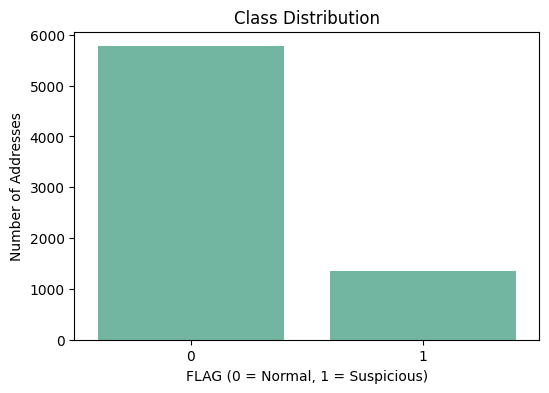

In [129]:
class_counts = df['FLAG'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, color=sns.color_palette('Set2')[0])
plt.title('Class Distribution')
plt.xlabel('FLAG (0 = Normal, 1 = Suspicious)')
plt.ylabel('Number of Addresses')
plt.show()


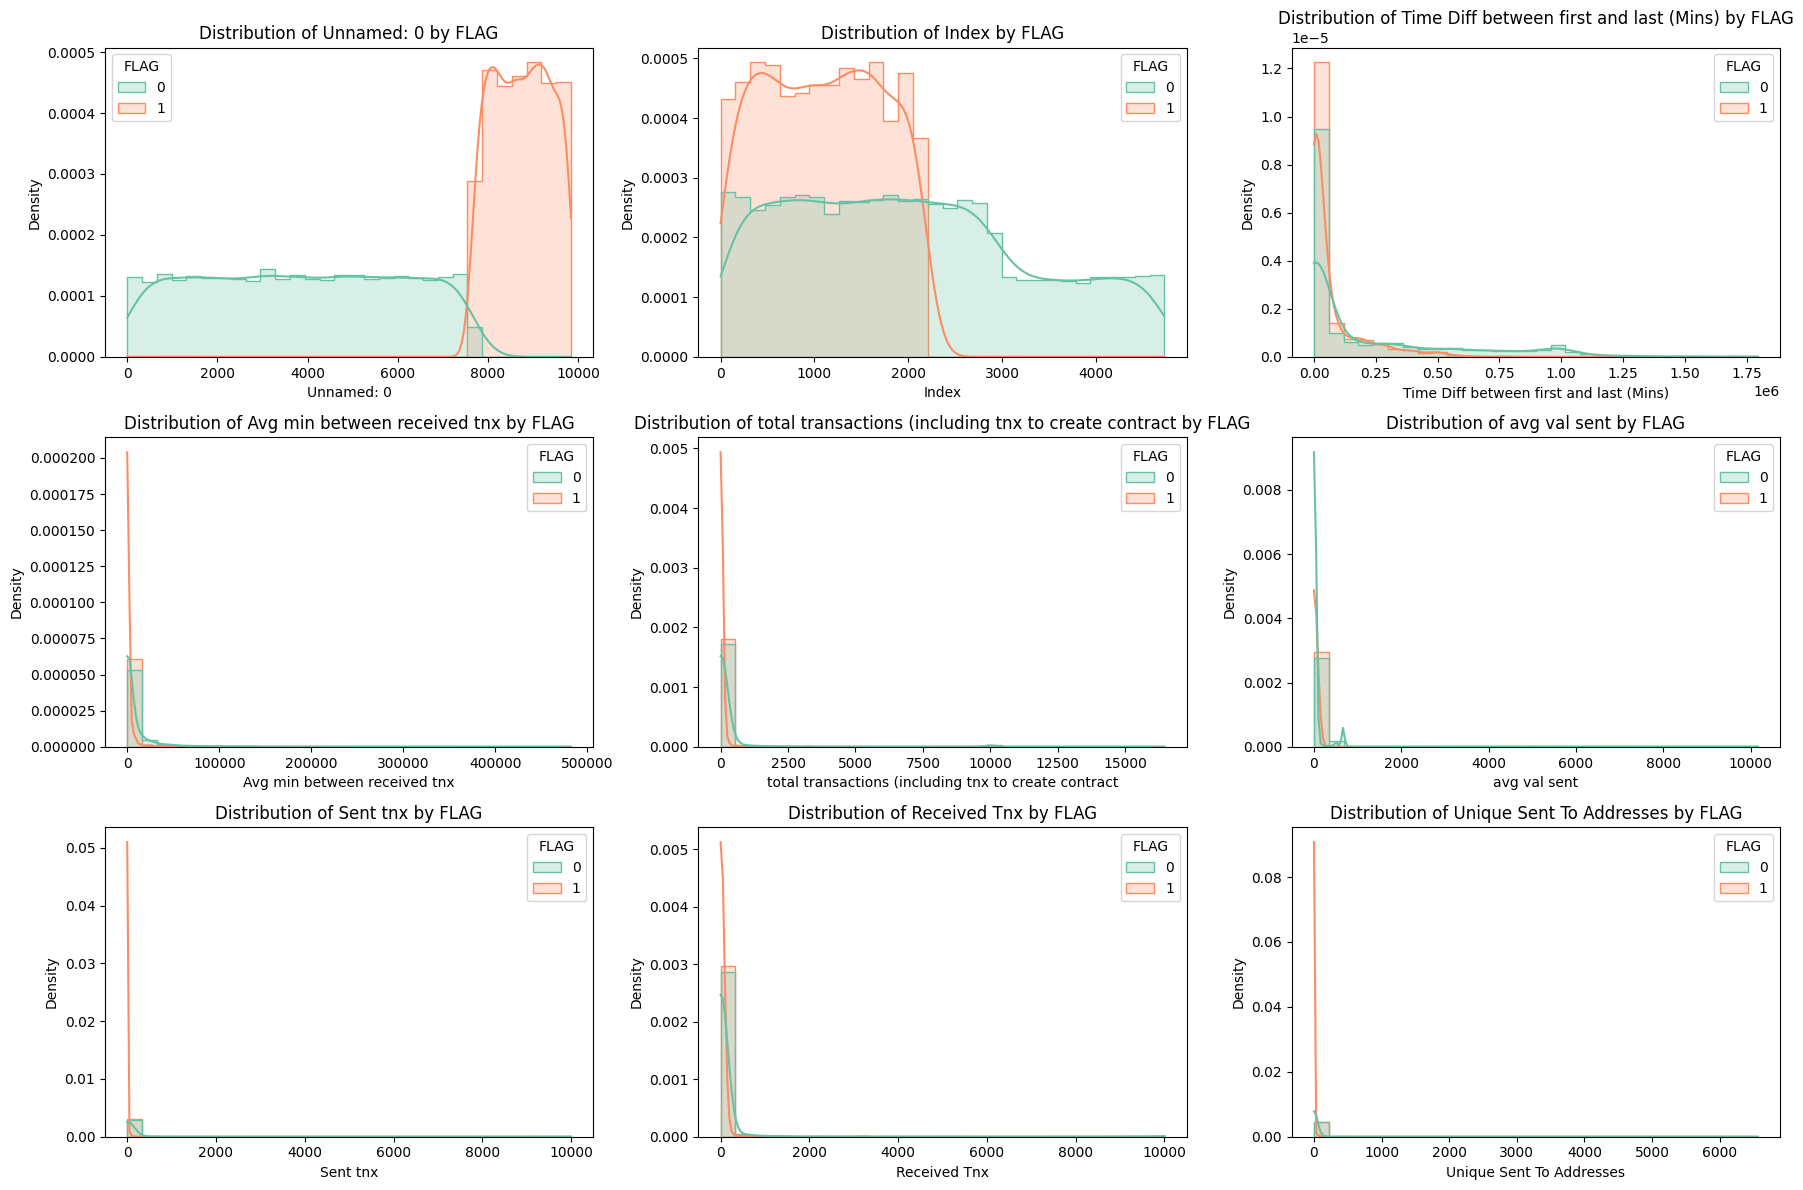

In [130]:
# Recalculate top features for distribution histograms (top 9)
flag_corr = numeric_df.corr()['FLAG'].drop('FLAG')
top9 = flag_corr.abs().sort_values(ascending=False).head(9).index

plt.figure(figsize=(18, 12))
for i, feature in enumerate(top9):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='FLAG', kde=True, bins=30, element='step',
                 stat='density', common_norm=False, palette='Set2')
    plt.title(f'Distribution of {feature} by FLAG')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


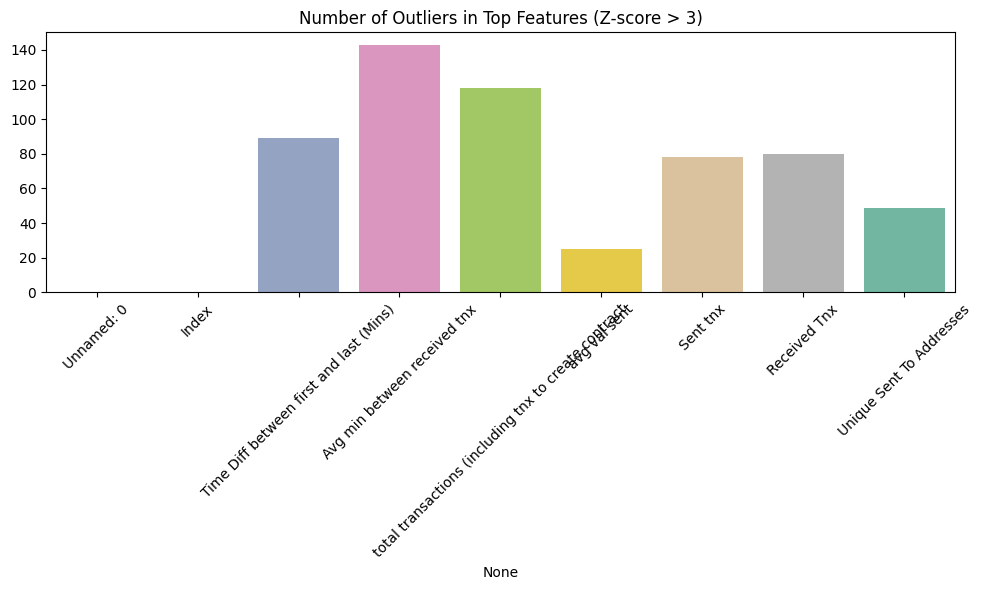

In [131]:
from scipy.stats import zscore

# Calculate outliers per top9 features
z_scores = np.abs(zscore(df[top9]))
outlier_counts = (z_scores > 3).sum(axis=0)

# Convert to pandas Series to use indices for plotting
outlier_counts_series = pd.Series(outlier_counts, index=top9)

plt.figure(figsize=(10, 6))
sns.barplot(x=outlier_counts_series.index, y=outlier_counts_series.values, palette='Set2', hue=outlier_counts_series.index, legend=False)
plt.title('Number of Outliers in Top Features (Z-score > 3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


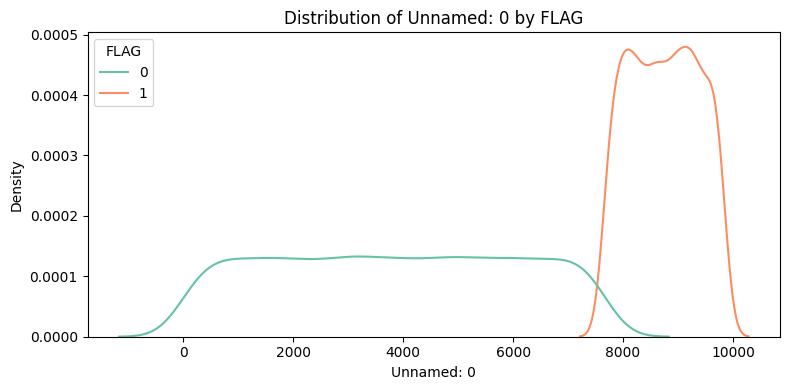

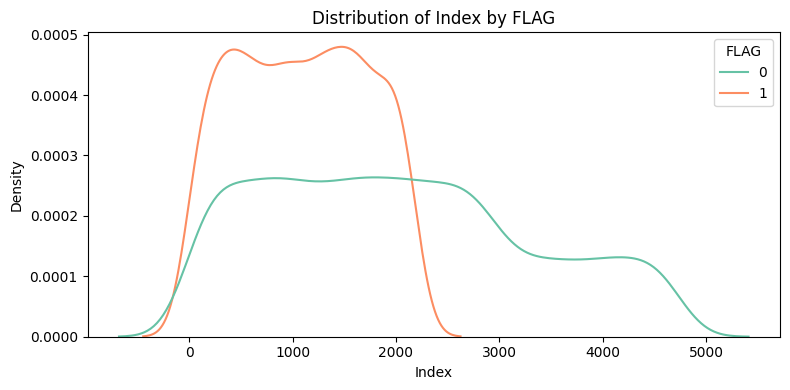

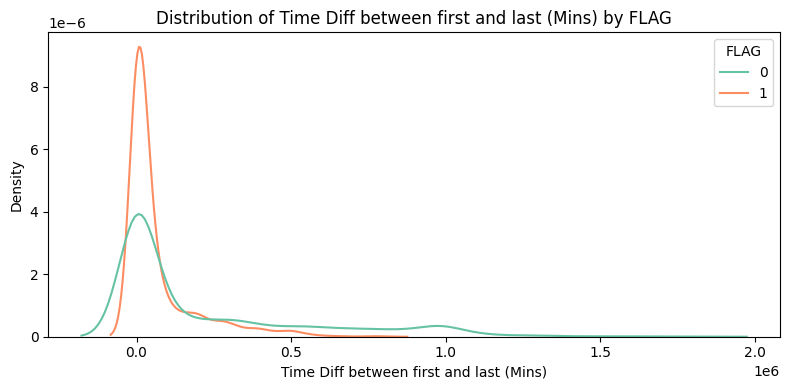

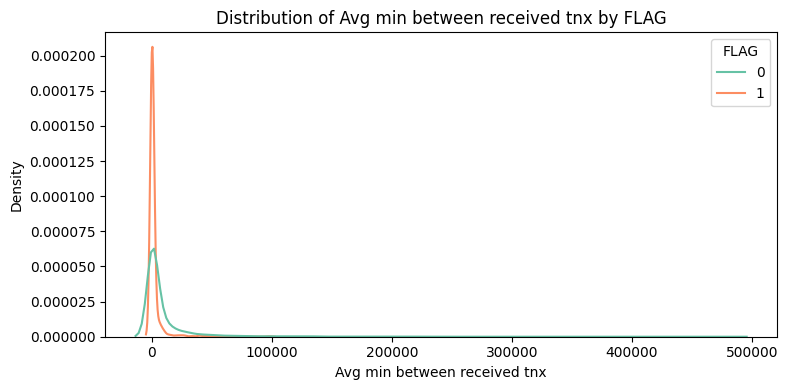

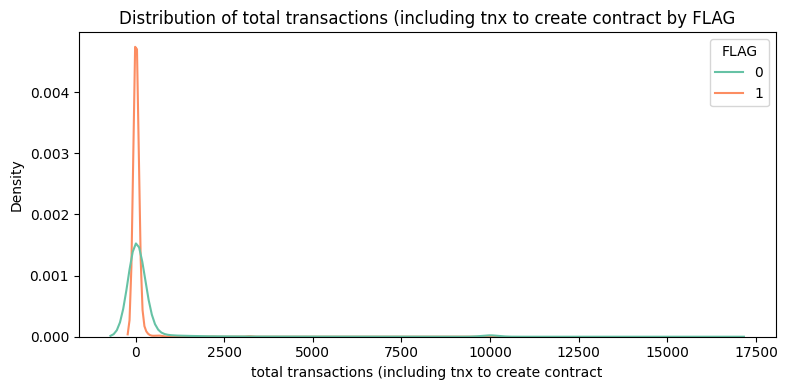

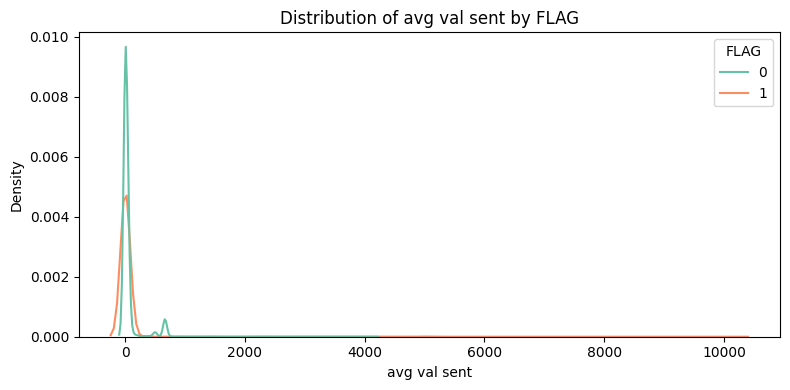

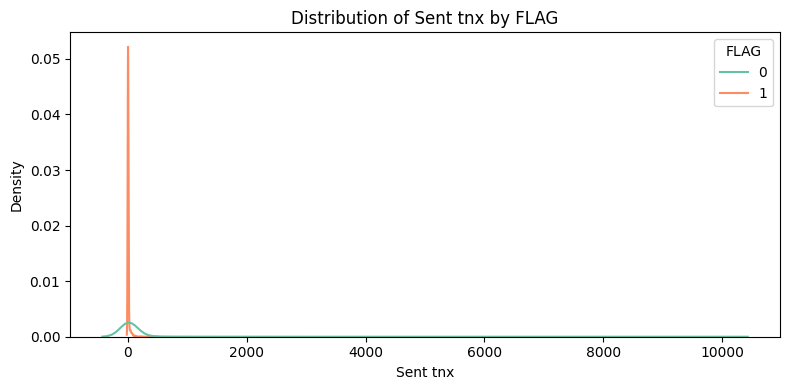

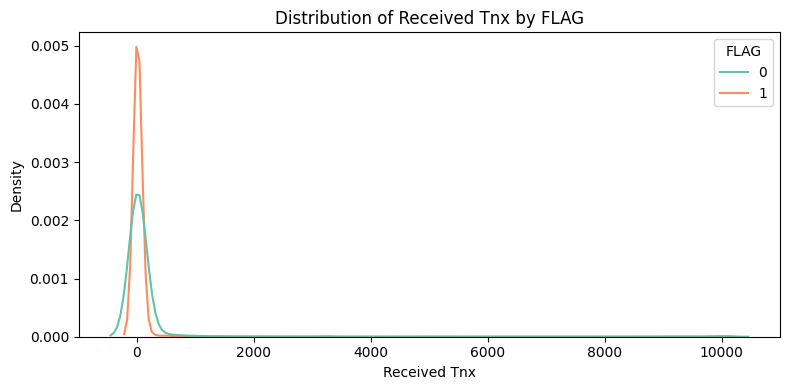

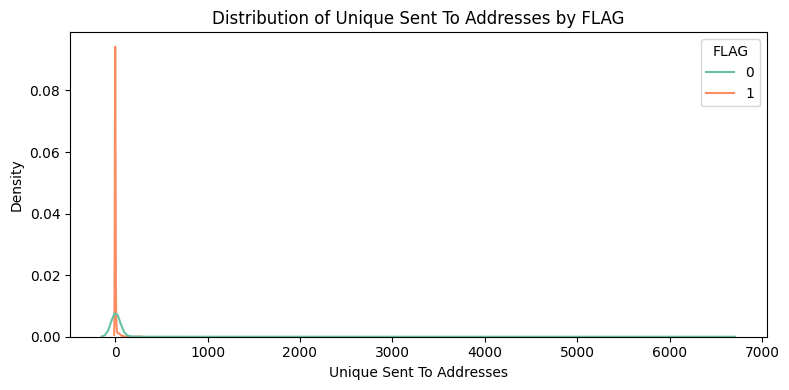

In [133]:
# KDE plots
for feature in top9:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='FLAG', palette='Set2', common_norm=False)
    plt.title(f'Distribution of {feature} by FLAG')
    plt.tight_layout()
    plt.show()



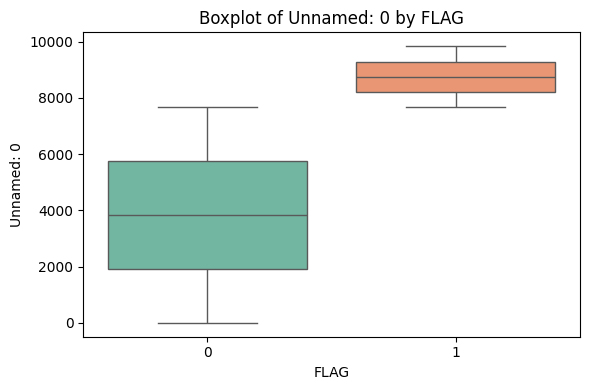

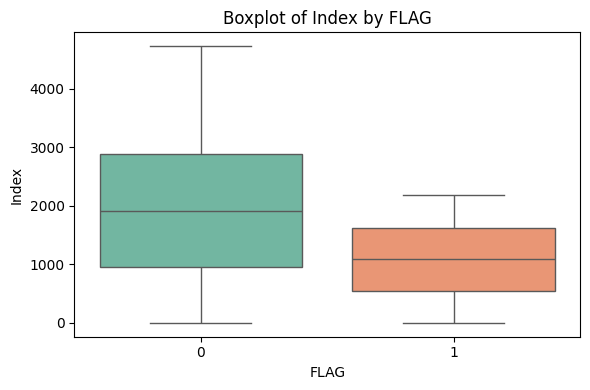

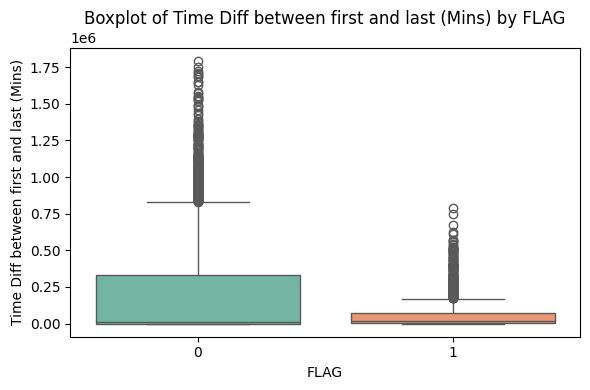

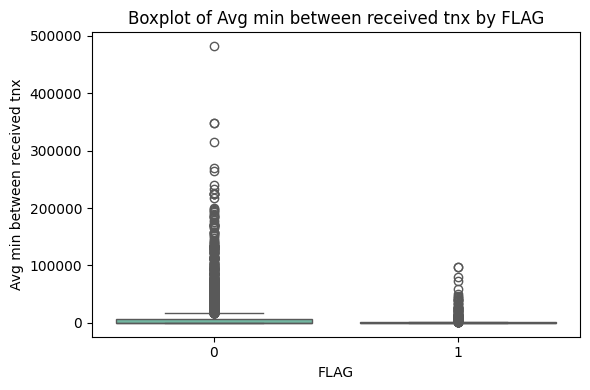

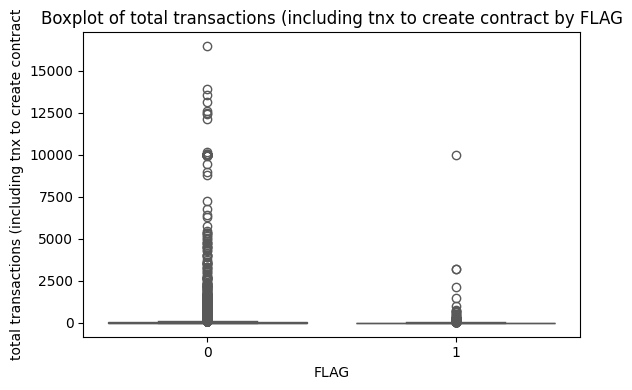

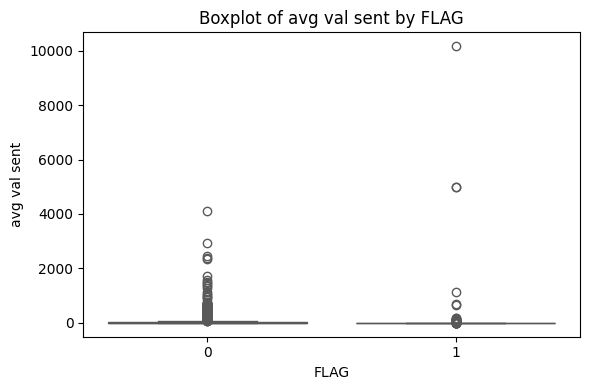

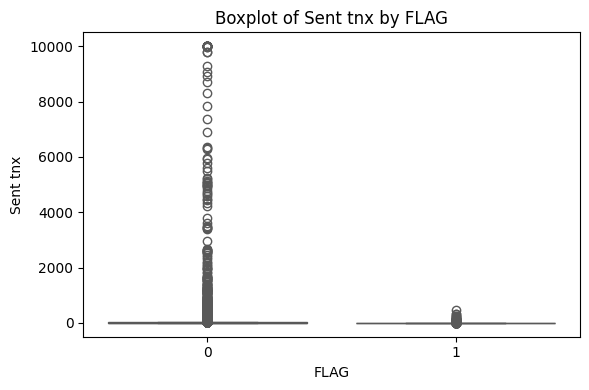

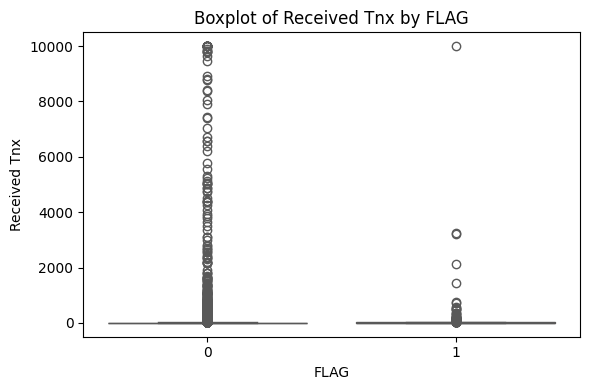

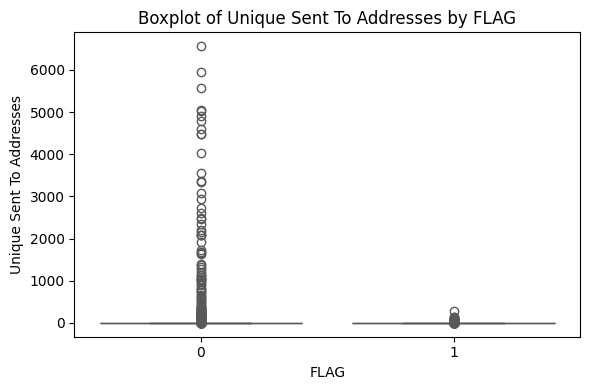

In [134]:
# Boxplots
for feature in top9:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='FLAG', y=feature, data=df, hue='FLAG', palette='Set2', dodge=False, legend=False)
    plt.title(f'Boxplot of {feature} by FLAG')
    plt.tight_layout()
    plt.show()
